In [92]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import cityscapesscripts
import os
from PIL import Image
from torchvision.io import read_image

class YourCustomDataset(Dataset):
    def __init__(self, root_path, input, target, split, input_beta = 0.01, train_transform=None):
        """
        Args:
            root_path (str): path to data
            input (str): specific path to input data 
            target (str): specific path to target (annotation) data
            split (str): split to get data from ("train", "test", or "val")
            input_beta (float): defines the synthetic fog density to filter the images to
            train_transform (bool, optional): Applies the defined data transformations used in training. Defaults to None.
        """
        super(YourCustomDataset, self).__init__()
        self.root_path = root_path
        self.input = input
        self.target = target
        self.split = split
        self.input_beta = input_beta
        self.train_transform = train_transform

        # iterates through split of data and creates an array of image names filtered to specified fog beta
        self.image_names = []
        X_SPLIT_PATH = os.path.join(self.root_path, self.input, self.split)
        for CITY_NAME in os.listdir(X_SPLIT_PATH):
            CITY_PATH = os.path.join(X_SPLIT_PATH, CITY_NAME)
            for image_name in os.listdir(CITY_PATH):
                if str(self.input_beta) in image_name:
                    IMAGE_PATH = os.path.join(CITY_PATH, image_name)
                    self.image_names.append(IMAGE_PATH)

        # same for annotation_names, filters to color annotation_names
        self.annotation_names = []
        Y_SPLIT_PATH = os.path.join(self.root_path, self.target, self.split)
        for CITY_NAME in os.listdir(Y_SPLIT_PATH):
            CITY_PATH = os.path.join(Y_SPLIT_PATH, CITY_NAME)
            for annotation_name in os.listdir(CITY_PATH):
                if "color" in annotation_name:
                    ANNOTATION_PATH = os.path.join(CITY_PATH, annotation_name)
                    self.annotation_names.append(ANNOTATION_PATH)

    def __len__(self):
        number_files_input = len(self.image_names)
        number_files_target = len(self.annotation_names)

        if number_files_input == number_files_target:
            return number_files_input
        else:
            return f"Input: {number_files_input} does not match Target: {number_files_target}"
        
    def __getitem__(self, idx):
        """
        Necessary function that loads and returns a sample from the dataset at a given index. 
        https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
        
        Based on the index,it identifies the input and target images location on the disk, 
        reads both items as a numpy array (float32). If the train_transform argument is True, 
        the above defined train transformations are applied. Else, the test transformations are applied
        Args:
            idx (iterable): 
        Returns:
            tensors: input and target image
        """
        input_path = self.image_names[idx]
        target_path = self.annotation_names[idx]

        input_img = Image.open(input_path)
        target_img = Image.open(target_path)

        sample = {'input_img': input_img, 'input_name': input_path.split("\\")[-1], 'target_img': target_img, 'target_name': target_path.split("\\")[-1]}

        return sample    
    
def plot_sample(sample):
    plt.figure(figsize=(16,8))
    plt.subplot(121)
    plt.title(sample['input_name'])
    plt.imshow(sample['input_img'])
    plt.subplot(122)
    plt.title(sample['target_name'])
    plt.imshow(sample['target_img'])
    plt.show()

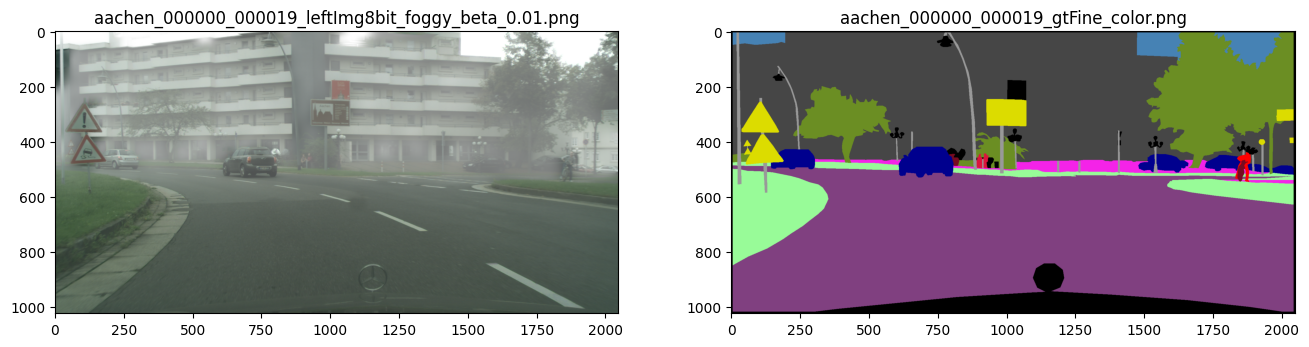

In [95]:
ROOT_PATH = r"C:\Users\Jayden Hsiao\Documents\Grad School\02 - Fall 2024\SYDE 577\semantic-foggy-driving\data"
INPUT_PATH = r"leftImg8bit_trainvaltest_foggy\leftImg8bit_foggy"
TARGET_PATH = r"gtFine_trainvaltest\gtFine"

train_dataset = YourCustomDataset(root_path=ROOT_PATH, input=INPUT_PATH, target=TARGET_PATH, split="train")
val_dataset = YourCustomDataset(root_path=ROOT_PATH, input=INPUT_PATH, target=TARGET_PATH, split="val")

plot_sample(val_dataset[0])